In [57]:
from pandas import read_csv, DataFrame
from factor_analyzer import FactorAnalyzer

study_home = '/moochie/user_data/CamachoCat/Aggregate_anats'
output_dir = '/home/camachocm2/Dropbox/temp/agganats20190915/GLMs/figures/'

subject_info = read_csv(study_home + '/doc/subject_info_new.csv', index_col=0)
features=subject_info.iloc[:,7:22]

fa = FactorAnalyzer()
fa.analyze(features,4,rotation='varimax', method='ml')
print(fa.get_factor_variance())

                 Factor1   Factor2   Factor3   Factor4
SS Loadings     1.148699  2.247615  2.398127  1.914444
Proportion Var  0.076580  0.149841  0.159875  0.127630
Cumulative Var  0.076580  0.226421  0.386296  0.513926


In [58]:
loadings = fa.loadings
#loadings = loadings.sort_values('Factor1')
print(loadings)

                          Factor1   Factor2   Factor3   Factor4
activity_level           0.284350  0.662727  0.193775 -0.076619
anger_frustration        0.248229  0.239512  0.649671 -0.397947
approach                 0.073434  0.394500  0.490186  0.138363
attention_focusing      -0.083925 -0.429509 -0.241834  0.460125
discomfort               0.044686  0.060460  0.708801  0.021940
soothability            -0.209111 -0.160357 -0.451663  0.569666
fear                    -0.143159 -0.002110  0.457594  0.122224
high_intensity_pleasure  0.916313  0.378307  0.084140  0.071945
impulsivity              0.132648  0.827503  0.123077 -0.040482
inhibitory_control      -0.113420 -0.553735 -0.268588  0.529853
low_intensity_pleasure   0.060094  0.063710  0.268089  0.602191
perceptual_sensitivity   0.110290 -0.016258  0.223350  0.518795
sadness                  0.202834  0.068583  0.635271 -0.088915
shyness                 -0.004817 -0.485160  0.306749 -0.211379
smiling_laughter        -0.023324  0.051

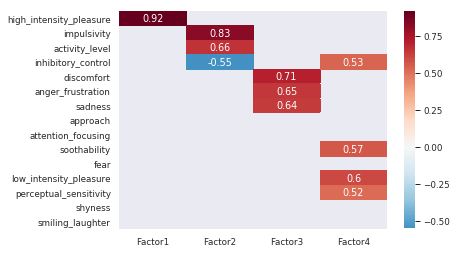

In [59]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(context='paper')
mask_upper = fa.loadings
mask_upper = mask_upper[mask_upper>=0.5]
mask_lower = fa.loadings
mask_lower = mask_lower[mask_lower<=-0.5]
mask = mask_upper.radd(mask_lower, fill_value=0)
mask = mask.sort_values(by=['Factor1','Factor2','Factor3'], ascending=False)
sns.heatmap(mask, annot=True, cmap='RdBu_r', center=0)
plt.savefig(output_dir + 'loadings_labeled_3factor.svg')
plt.show()

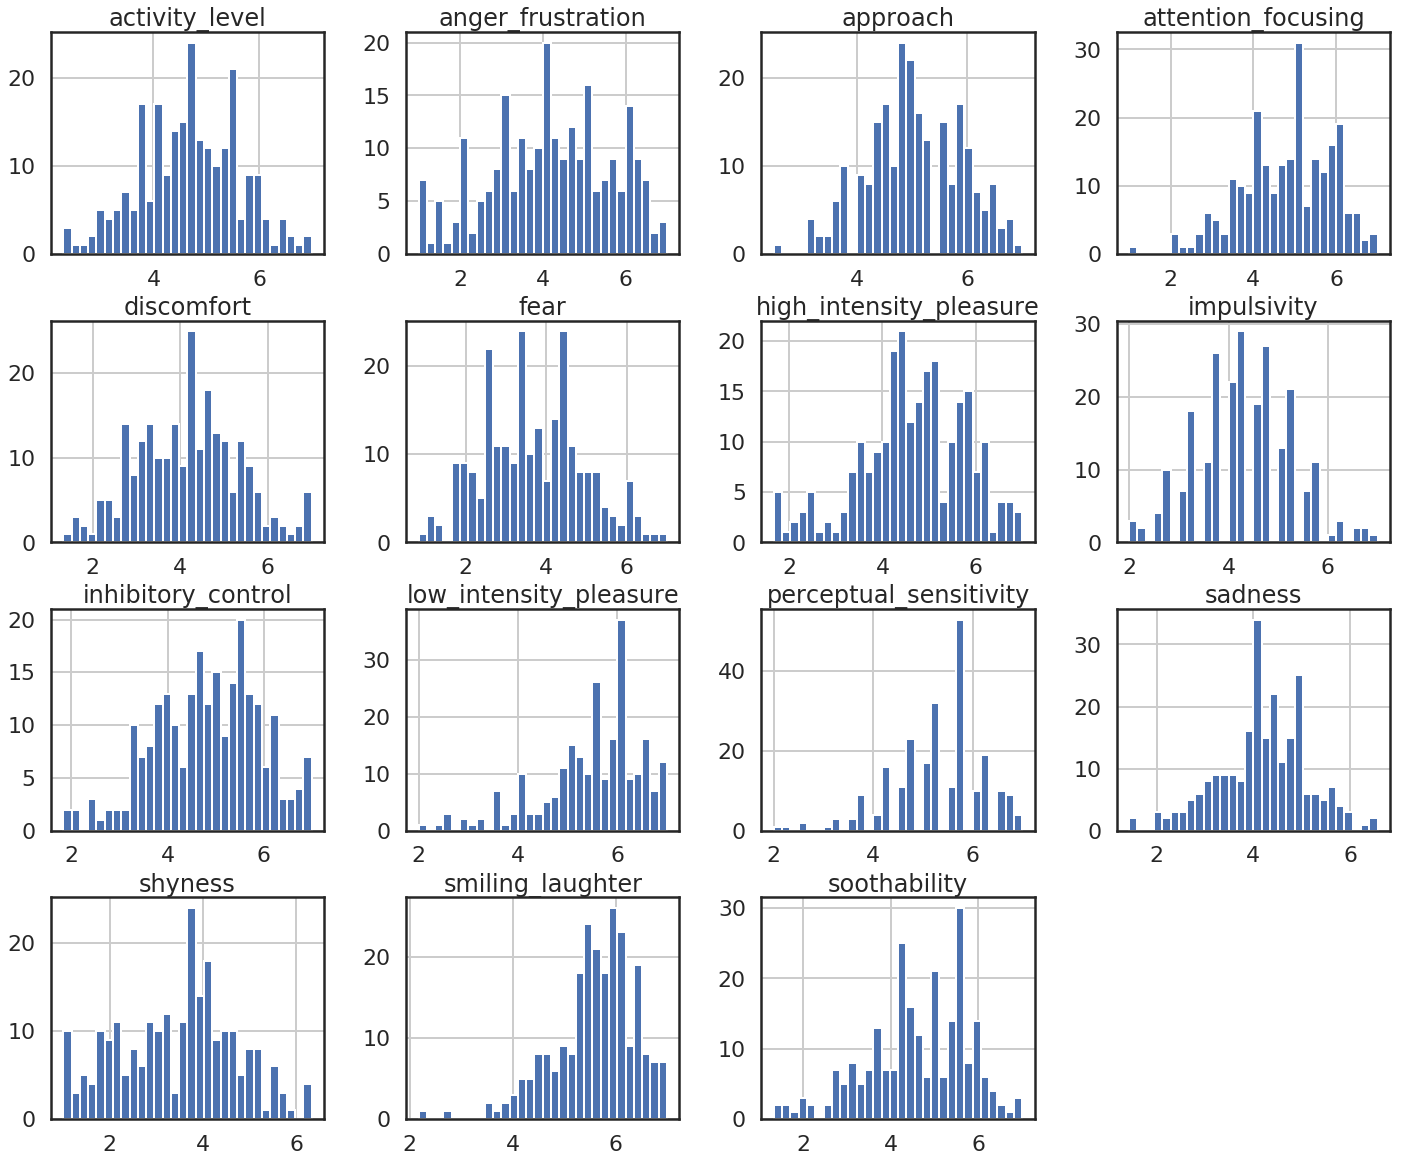

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='poster',style='white')
features.hist(bins=30, figsize=(24,20))
plt.savefig(output_dir + 'scale_distributions.svg')
plt.show()

          Age_yrs        male    USE  GMD_QC          eTIV  activity_level  \
count  131.000000  131.000000  131.0   131.0  1.310000e+02      131.000000   
mean     7.490258    0.519084    1.0     1.0  1.476948e+06        4.576947   
std      1.487437    0.501554    0.0     0.0  1.412484e+05        0.963704   
min      4.169747    0.000000    1.0     1.0  1.142335e+06        2.290000   
25%      6.446270    0.000000    1.0     1.0  1.384147e+06        4.000000   
50%      7.342916    1.000000    1.0     1.0  1.487993e+06        4.570000   
75%      8.454483    1.000000    1.0     1.0  1.571678e+06        5.215000   
max     10.945927    1.000000    1.0     1.0  1.943317e+06        6.710000   

       anger_frustration    approach  attention_focusing  discomfort  \
count         131.000000  131.000000          131.000000  131.000000   
mean            4.096870    5.046718            4.878168    4.114427   
std             1.458583    0.875325            1.232629    1.135105   
min      

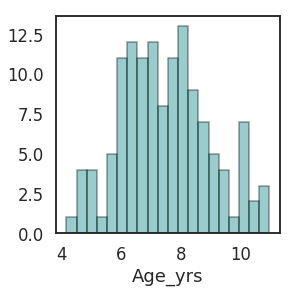

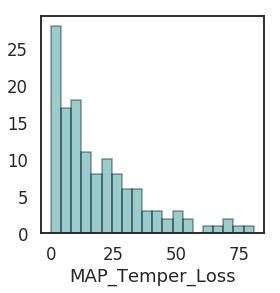

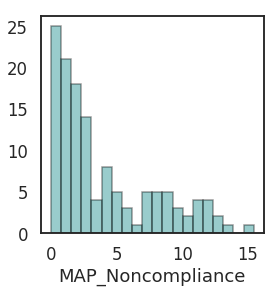

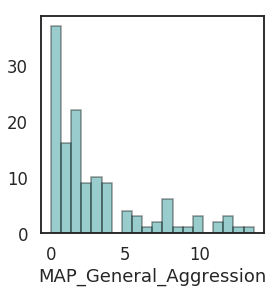

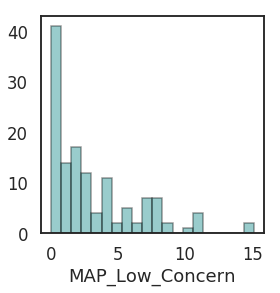

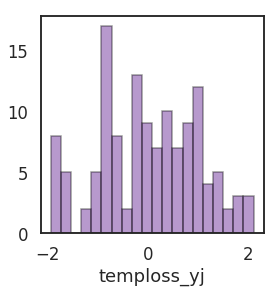

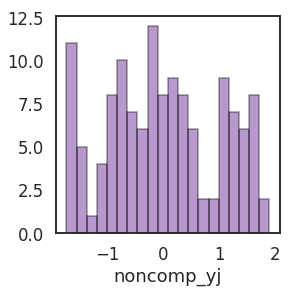

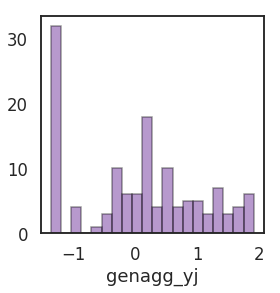

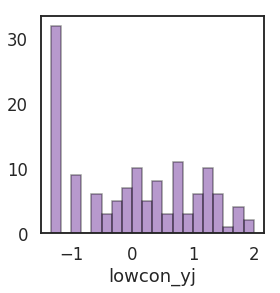

In [61]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
from scipy import stats
from pandas import read_csv
from numpy import isfinite
warnings.filterwarnings('ignore')
sns.set(context='talk',style='white')
#output_dir = '/home/camachocm2/Analysis/local_moochie/Aggregate_anats/GMD_ML/ml_trainingset/grant/'
subject_info= read_csv('/moochie/user_data/CamachoCat/Aggregate_anats/proc/group_data/smooth4/featureset_key.csv', index_col=0)
#subject_info = subject_info[subject_info['final_incl']==1]
subject_info = subject_info[isfinite(subject_info['genagg_yj'])].copy()
subject_info = subject_info[subject_info['Age_yrs']<11]
print(subject_info.describe())

for variable in ['Age_yrs', 'MAP_Temper_Loss','MAP_Noncompliance','MAP_General_Aggression','MAP_Low_Concern']:
    plt.figure(figsize=(4,4))
    sns.distplot(subject_info[variable],hist=True,kde=False,bins=20,color='teal', hist_kws={'edgecolor':'black'})
    plt.savefig(output_dir + variable + '_hist.svg')
    
#for variable in ['MAP_Temper_Loss','MAP_Noncompliance','MAP_General_Aggression','MAP_Low_Concern']:
#    plt.figure()
#    a = sns.jointplot(subject_info['Age_yrs'],subject_info[variable],
#                      marginal_kws={'kde':False,'bins':30})
#    a.annotate(stats.pearsonr,fontsize=12)
    #plt.savefig(variable+'_age_corr.svg')
#    plt.show()

for variable in ['temploss_yj', 'noncomp_yj', 'genagg_yj', 'lowcon_yj']:
    plt.figure(figsize=(4,4))
    sns.distplot(subject_info[variable],hist=True,kde=False,bins=20, color='indigo', hist_kws={'edgecolor':'black'})
    plt.savefig(output_dir + variable  +'_hist.svg')

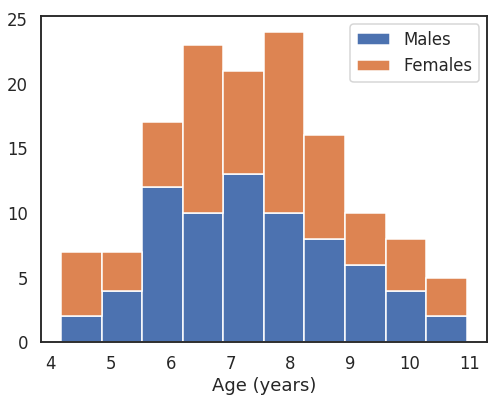

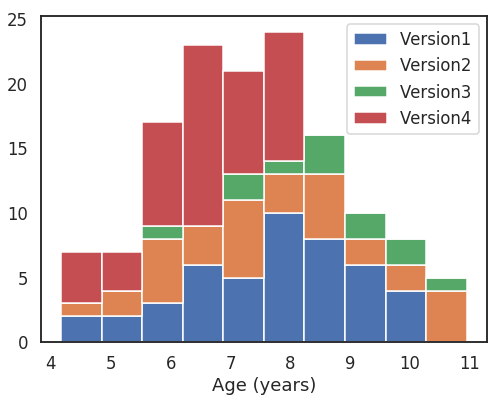

7.409358288523189
1.5304013556345064
0.5144927536231884
138


In [66]:
#subject_info = read_csv('/moochie/user_data/CamachoCat/Aggregate_anats/doc/subject_info_new.csv',index_col=0)
subject_info= read_csv('/moochie/user_data/CamachoCat/Aggregate_anats/proc/group_data/smooth4/featureset_key.csv', index_col=0)

subject_info = subject_info[subject_info['Age_yrs']<11].copy()
output_dir = '/home/camachocm2/Dropbox/temp/agganats20190915/GLMs/figures/'

sns.set(context='talk',style='white')

males = subject_info[subject_info['male']==1]
females = subject_info[subject_info['male']==0]

plt.figure(figsize=(8,6))
plt.hist([males['Age_yrs'],females['Age_yrs']], stacked=True, label=['Males','Females'])
plt.legend()
plt.xlabel('Age (years)')
#plt.savefig(output_dir + 'age_sex_hist_fullsample_CBQ.svg')
plt.show()


s1 = subject_info[subject_info['SequenceVersion']=='Sequence1']
s2 = subject_info[subject_info['SequenceVersion']=='Sequence2']
s3 = subject_info[subject_info['SequenceVersion']=='Sequence3']
s4 = subject_info[subject_info['SequenceVersion']=='Sequence4']

plt.figure(figsize=(8,6))
plt.hist([s1['Age_yrs'],s2['Age_yrs'],s3['Age_yrs'],s4['Age_yrs']], stacked=True, label=['Version1','Version2','Version3','Version4'])
plt.legend()
plt.xlabel('Age (years)')
#plt.savefig(output_dir + 'age_seq_hist_fullsample.svg')
plt.show()

print(subject_info['Age_yrs'].mean())
print(subject_info['Age_yrs'].std())
print(subject_info['male'].mean())
print(len(subject_info))

In [44]:
import pandas as pd
from pandas import read_csv
pd.set_option('display.max_columns', 60)

output_dir = '/home/camachocm2/Dropbox/temp/agganats20190915/GLMs/figures'

subject_data = read_csv('/moochie/user_data/CamachoCat/Aggregate_anats/proc/group_data/smooth4/featureset_key.csv',index_col=0)
cluster_data = read_csv('/moochie/user_data/CamachoCat/Aggregate_anats/proc/group_data/GLMs/smooth4_tloss_under11/cluster_L1vals/_get_L1vals2/clusters_extracted_L1vals.csv', index_col=0)

complete = subject_data.merge(cluster_data,right_on='Subject',left_on='freesurferID')
complete.describe()

,Age_yrs,male,USE,GMD_QC,eTIV,activity_level,anger_frustration,approach,attention_focusing,discomfort,soothability,fear,high_intensity_pleasure,impulsivity,inhibitory_control,low_intensity_pleasure,perceptual_sensitivity,sadness,shyness,smiling_laughter,MAP_Temper_Loss,MAP_Noncompliance,MAP_General_Aggression,MAP_Low_Concern,factor1,factor2,factor3,factor4,temploss_yj,noncomp_yj,genagg_yj,lowcon_yj,age_cent,age_sq,age_tl,age_ag,age_nc,age_lc,age_f1,age_f2,age_f3,age_f4,clust53,clust54,clust55,clust56,clust57,clust58,clust59,clust60,clust61,clust62,clust63,clust64,clust65,clust66,clust67,clust68
count,131.000000,131.000000,131.0,131.0,1.310000e+02,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,7.490258,0.519084,1.0,1.0,1.476948e+06,4.576947,4.096870,5.046718,4.878168,4.114427,4.552443,3.645038,4.576641,4.200916,4.920153,5.414504,5.210992,4.173664,3.443282,5.561298,19.122137,3.969542,2.879389,3.087863,-0.043854,-0.096584,-0.038053,-0.049317,0.012862,-0.010129,0.026687,0.013146,-0.109134,0.654530,-0.107013,0.033592,-0.094906,-0.008649,-0.097432,-0.053235,-0.273784,-0.140383,0.795645,0.678442,0.368596,0.344168,0.615484,0.524912,0.429896,0.690368,0.551969,0.493928,0.220628,0.580503,0.559470,0.519505,0.509958,0.760169
std,1.487437,0.501554,0.0,0.0,1.412484e+05,0.963704,1.458583,0.875325,1.232629,1.135105,1.159386,1.285882,1.199948,0.951968,1.107632,1.064882,0.984861,0.938722,1.233533,0.874050,17.994881,3.839735,3.305462,3.335298,1.004390,1.000837,1.084307,1.054254,1.002754,1.016840,1.012426,1.009667,0.804713,0.795623,0.770855,0.761825,0.803379,0.786956,0.723413,0.855590,0.936451,0.880362,0.077720,0.048495,0.092095,0.112038,0.064899,0.160111,0.107368,0.089414,0.105997,0.081844,0.075578,0.071142,0.133863,0.077344,0.105041,0.059234
min,4.169747,0.000000,1.0,1.0,1.142335e+06,2.290000,1.000000,3.170000,1.000000,1.330000,1.330000,1.170000,1.670000,2.000000,2.170000,2.380000,2.000000,1.430000,1.000000,2.170000,0.000000,0.000000,0.000000,0.000000,-2.761004,-2.088563,-3.959982,-2.850611,-1.936286,-1.722795,-1.356682,-1.332501,-1.905553,0.000005,-3.173471,-2.223531,-2.823570,-2.183900,-2.999723,-2.434399,-3.664508,-4.313232,0.549577,0.602550,0.167903,0.046445,0.416162,0.228948,0.173099,0.453145,0.262489,0.277431,0.027525,0.417848,0.272690,0.301186,0.217060,0.589062
25%,6.446270,0.000000,1.0,1.0,1.384147e+06,4.000000,3.000000,4.500000,4.000000,3.330000,3.670000,2.830000,3.830000,3.500000,4.170000,4.880000,4.670000,3.710000,2.670000,5.170000,5.000000,1.000000,0.320000,0.440000,-0.713798,-0.859580,-0.666255,-0.639967,-0.756931,-0.801853,-0.937607,-0.855123,-0.673939,0.088304,-0.359556,-0.253133,-0.429786,-0.323135,-0.389826,-0.301008,-0.528409,-0.334778,0.753690,0.649678,0.312494,0.276018,0.591075,0.411661,0.341813,0.626902,0.483418,0.429789,0.168477,0.526093,0.470162,0.468764,0.461194,0.718635
50%,7.342916,1.000000,1.0,1.0,1.487993e+06,4.570000,4.000000,5.000000,5.170000,4.000000,4.670000,3.500000,4.670000,4.170000,5.000000,5.630000,5.330000,4.140000,3.500000,5.670000,13.000000,2.480000,1.920000,2.000000,-0.114613,-0.177213,0.002429,-0.003158,-0.006599,-0.078216,0.147195,0.065969,-0.188847,0.371499,-0.094742,-0.033754,-0.056748,-0.050808,-0.064812,-0.025087,-0.059813,-0.048466,0.818317,0.669421,0.370659,0.351379,0.628920,0.502196,0.434096,0.691614,0.571933,0.496993,0.222876,0.581752,0.558157,0.510637,0.512482,0.760932
75%,8.454483,1.000000,1.0,1.0,1.571678e+06,5.215000,5.085000,5.750000,5.830000,4.915000,5.500000,

13.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


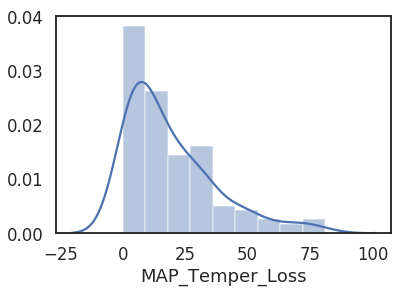

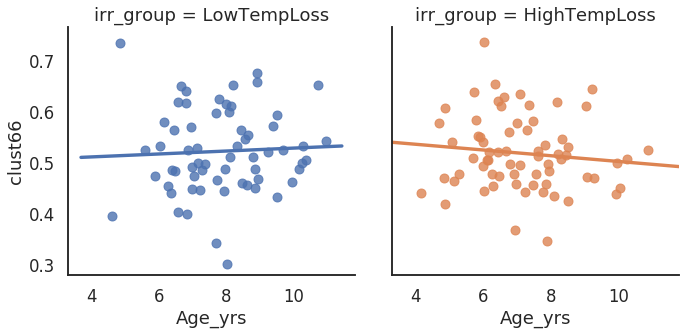

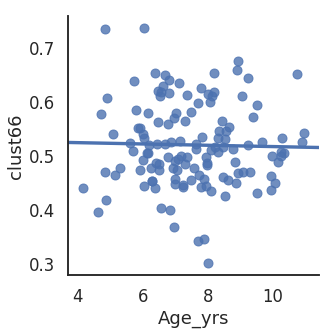

In [52]:
import seaborn as sns
from pandas import Series
from numpy import median

complete['irr_group'] = Series(['medianTempLoss']*len(complete.index),index=complete.index)
complete['irr_group'][complete['MAP_Temper_Loss']<13]='LowTempLoss'
complete['irr_group'][complete['MAP_Temper_Loss']>=13]='HighTempLoss'

sns.distplot(complete['MAP_Temper_Loss'])
print(median(complete['MAP_Temper_Loss']))
sns.lmplot('Age_yrs','clust66',col='irr_group',hue='irr_group',data=complete,ci=None)
sns.lmplot('Age_yrs','clust66',data=complete,ci=None)